In [4]:

! pip install optuna -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.9/78.9 kB 7.8 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [6]:
#load data
data = pd.read_csv('teleCust1000t.csv')
data.head()


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [7]:
# Separar características y variable objetivo
X = data.drop('custcat', axis=1)
y = data['custcat']

In [8]:
# Convertir la variable objetivo a tipo categórico
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 3 2 0 2 2 1 3 2 1 0 2 0 3 0 1 2 2 0 3 1 0 3 0 2 2 3 2 0 1 1 3 2 1 3 1 3
 2 2 2 2 2 0 3 2 1 1 3 0 2 0 1 3 0 0 0 1 0 2 1 2 3 0 3 3 0 2 2 0 0 0 1 0 1
 2 0 2 0 2 3 3 0 3 2 1 0 1 3 3 2 1 0 1 3 0 3 2 1 2 1 3 2 2 1 1 1 0 3 0 1 1
 1 0 1 2 0 2 2 2 0 0 0 0 1 0 1 3 1 1 3 2 0 3 1 2 0 0 2 2 3 3 2 3 1 2 0 3 1
 1 1 0 2 3 3 3 2 0 0 1 2 2 2 0 2 1 1 3 0 0 1 3 0 3 0 1 0 2 3 3 0 3 0 1 1 1
 0 0 1 2 2 0 3 1 2 3 0 0 2 0 3 0 3 1 1 3 0 2 3 2 2 0 0 0 1 1 0 2 3 3 0 2 3
 0 2 0 3 3 0 2 2 2 2 1 0 3 1 3 3 0 3 0 3 2 1 0 2 1 0 0 1 0 3 1 1 3 2 1 0 3
 3 3 0 2 1 0 0 2 2 2 0 2 1 3 0 2 1 1 2 2 0 3 3 2 1 2 2 3 2 2 1 3 2 1 2 3 3
 2 0 3 1 2 2 1 1 0 3 1 2 3 0 0 1 1 3 3 0 2 0 3 0 3 2 1 3 0 2 0 2 3 0 0 0 0
 3 1 0 2 0 0 2 0 3 0 3 2 0 1 2 3 3 3 2 0 2 1 2 1 1 2 2 2 2 3 1 2 0 3 2 0 3
 3 2 1 3 0 0 1 1 3 0 0 1 2 1 1 2 0 3 2 1 0 3 3 3 2 3 2 1 2 2 1 2 1 2 0 2 3
 1 0 1 3 0 1 1 2 1 0 2 1 0 1 0 2 3 1 1 3 0 2 1 0 1 0 1 3 3 0 3 2 3 3 2 3 0
 2 1 2 0 3 2 2 0 0 1 3 0 3 1 2 3 0 3 2 1 2 3 2 0 1 0 1 2 1 0 3 1 3 2 1 0 0
 0 1 0 2 0 0 2 1 2 0 0 0 

In [9]:
#Análisis básico de datos
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB
None
          region       tenure          age      marital      address  \
count  1000.0000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      2.0220    35.526000    41.684000     0.495000    11.551000   
std       0.8162    21.359812    12.558816     0.500225    10.086681   
min       1.0000 

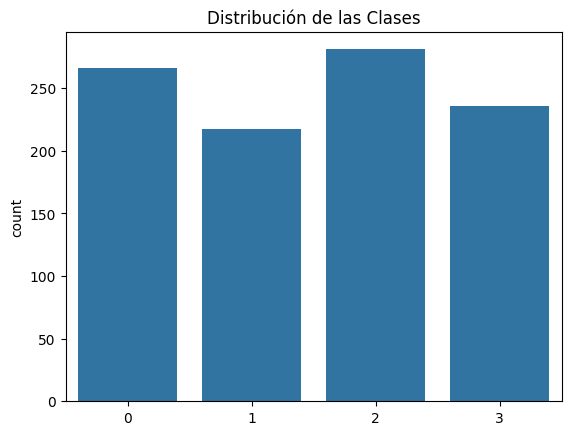

In [10]:
 #Visualización inicial
sns.countplot(x=y)
plt.title("Distribución de las Clases")
plt.show()

In [11]:
#Manejo de valores nulos
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [12]:
#Estandarización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

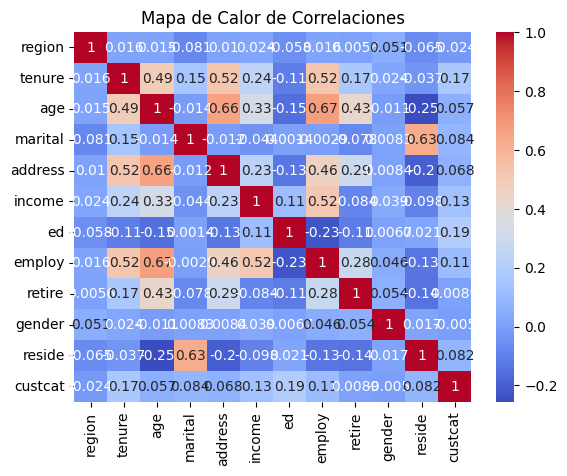

In [13]:
# Correlación entre las características numéricas
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Mapa de Calor de Correlaciones")
plt.show()


In [14]:
#PCA para reducción de dimensionalidad (opcional)
pca = PCA(n_components=0.95)  # Mantener el 95% de la varianza
X_pca = pca.fit_transform(X_scaled)

print(f"Componentes principales retenidos: {pca.n_components_}")

Componentes principales retenidos: 9


In [15]:
from collections import Counter

# Calcular las proporciones actuales de las clases
print(f"Distribución original de las clases: {Counter(y)}")

# Definir la estrategia de SMOTE como un diccionario
# Aquí ajustamos las clases para que todas tengan un mínimo deseado de muestras.
desired_samples_per_class = max(Counter(y).values())  # Ejemplo: igualar todas las clases al tamaño mayor
sampling_strategy = {cls: desired_samples_per_class for cls in np.unique(y)}

Distribución original de las clases: Counter({2: 281, 0: 266, 3: 236, 1: 217})


In [16]:
# Manejo de desbalanceo
# Crear el SMOTE multiclase con la estrategia definida
oversample = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
# Submuestreo opcional para reducir clases mayoritarias (solo si es necesario)
undersample = RandomUnderSampler(sampling_strategy='not minority', random_state=42)


In [17]:
# Crear pipeline para manejo de desbalanceo
imb_pipeline = ImbPipeline(steps=[
    ('oversample', oversample),
    ('undersample', undersample)
])

X_resampled, y_resampled = imb_pipeline.fit_resample(X_pca, y)
# Verificar la nueva distribución
print(f"Distribución después del resampling: {Counter(y_resampled)}")

Distribución después del resampling: Counter({0: 281, 1: 281, 2: 281, 3: 281})


In [18]:
data.to_csv('preprocessed_data.csv', index=False)
df = pd.read_csv('preprocessed_data.csv')
df.head()


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [19]:
#Entrenamiento de varios modelos para multiclase
# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Modelos para probar
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y)), eval_metric='mlogloss', random_state=42),
    'LightGBM': LGBMClassifier(objective='multiclass', random_state=42)
}

# Validación cruzada y evaluación de modelos
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = {}

for name, model in models.items():
    print(f"Entrenando modelo: {name}")
    scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy')
    print(f"{name} - Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}")
    results[name] = (np.mean(scores), np.std(scores))



Entrenando modelo: RandomForest
RandomForest - Accuracy: 0.4438 ± 0.0210
Entrenando modelo: XGBoost
XGBoost - Accuracy: 0.4349 ± 0.0166
Entrenando modelo: LightGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000419 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2160
[LightGBM] [Info] Number of data points in the train set: 719, number of used features: 9
[LightGBM] [Info] Start training from score -1.384905
[LightGBM] [Info] Start training from score -1.384905
[LightGBM] [Info] Start training from score -1.390476
[LightGBM] [Info] Start training from score -1.384905
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp


Mejor modelo: RandomForest

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.38      0.38      0.38        56
           1       0.45      0.54      0.49        56
           2       0.33      0.30      0.31        57
           3       0.40      0.38      0.39        56

    accuracy                           0.40       225
   macro avg       0.39      0.40      0.39       225
weighted avg       0.39      0.40      0.39       225



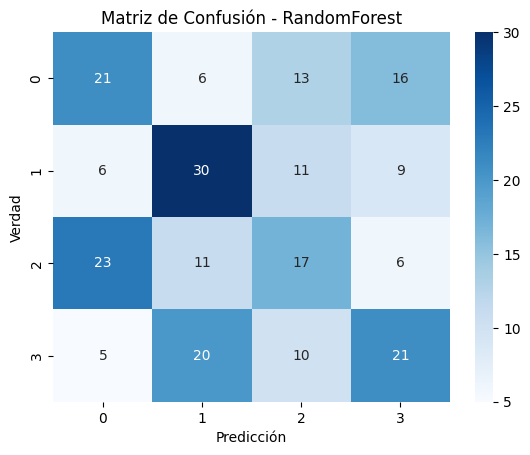

In [20]:
#Escoge el mejor modelo y evalúalo en el conjunto de prueba
best_model_name = max(results, key=lambda x: results[x][0])
best_model = models[best_model_name]

print(f"\nMejor modelo: {best_model_name}")
best_model.fit(X_train, y_train)

# Predicciones
y_pred = best_model.predict(X_test)

# Métricas
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f"Matriz de Confusión - {best_model_name}")
plt.xlabel("Predicción")
plt.ylabel("Verdad")
plt.show()

In [21]:
# Guardar modelos
import joblib
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']